# Goeduhub Technologies - ML Training - Task 7
## Registration ID: GO_STP_939 
## Name: Manoj Kannan D
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Task: Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python
Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.

In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.

Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

**Prepare a prediction model for profit of 50_Startups data in Python.**

# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Exploring Dataset

In [3]:
# dimensions of the dataset
df.ndim

2

In [4]:
# shape of the dataset
df.shape

(50, 5)

In [5]:
# size of the dataset (total umber of elements)
df.size

250

In [6]:
# columns present in our dataset
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
# datatypes of the each column
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
# provides statistical analysis only in numerrical columns
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
df.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [11]:
# check for null elements
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

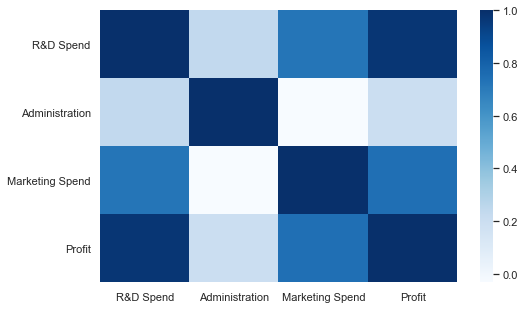

In [12]:
#Correlation between input features
correlation = df.corr()
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(data=correlation,cmap='Blues')

## Analysis:
Thus, 'R&D Spend' and 'Marketing Spend' contributes more in the estimation of Profit.

# Visualizing Input Data

Text(0.5, 0, 'Marketing Spend')

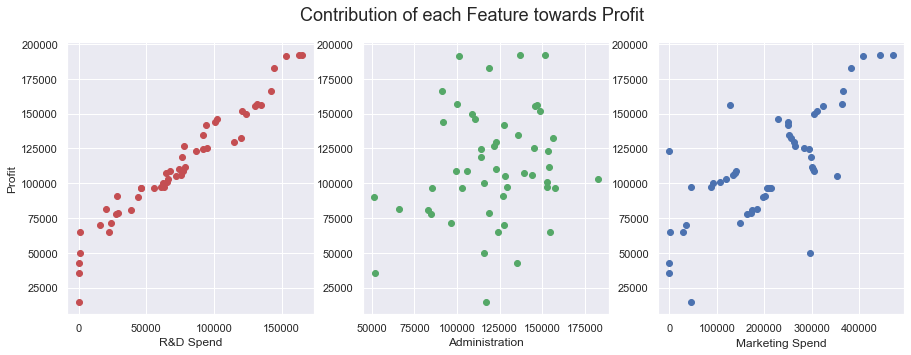

In [13]:
#PLot
plt.figure(figsize=(15,5))
plt.suptitle('Contribution of each Feature towards Profit',fontsize=18)

#plot 1
plt.subplot(1,3,1)
plt.scatter(df['R&D Spend'],df['Profit'], c = 'r')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

#plot 2
plt.subplot(1,3,2)
plt.scatter(df['Administration'],df['Profit'], c = 'g')
plt.xlabel('Administration')

#plot 3
plt.subplot(1,3,3)
plt.scatter(df['Marketing Spend'],df['Profit'], c = 'b')
plt.xlabel('Marketing Spend')

In [14]:
def Profit_Percent(value):
    return (value / state['Profit'].sum()) * 100

state = df.groupby('State').sum()
state['Profit_Percent'] = state['Profit'].apply(Profit_Percent)
state

,R&D Spend,Administration,Marketing Spend,Profit,Profit_Percent
State,,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98,31.539083
Florida,1291584.26,1948302.36,3957176.82,1900384.39,33.931606
New York,1295316.06,2066239.00,3490882.27,1933859.59,34.529310


California    17
New York      17
Florida       16
Name: State, dtype: int64


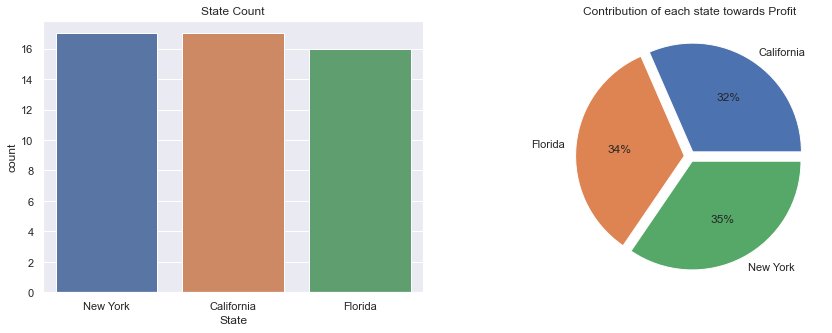

In [15]:
print(df['State'].value_counts())

plt.figure(figsize=(15,5))
#plot 1
# Visualisations on state column
plt.subplot(1,2,1)
plt.title('State Count')
sns.countplot(x=df['State'])

#plot 2
plt.subplot(1,2,2)
plt.pie(state['Profit_Percent'],labels = ['California','Florida','New York'],autopct='%.0f%%',explode=(0.05,0.05,0.05))
plt.title('Contribution of each state towards Profit')
plt.show()

## Inference:
There is a linear relationship between the multiple input independent features and output variable.<br>
**So, lets train the model using SKLearn LinearRegression(), to find the line of best fit and to make predictions.**

# ML Model
## Data PreProcessing
### Label Encoding
Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. <br>
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [16]:
# encode the categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['State'] = le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [18]:
le.classes_

array(['California', 'Florida', 'New York'], dtype=object)

## Train Test Split

In [19]:
X = df.drop(['Profit'],axis=1)
Y = df.Profit

In [20]:
#independent variables
X[:5]

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,random_state=5)
# random_state is set for reproduciblity of same results

print('X_train shape -',X_train.shape)
print('X_test shape -',X_test.shape)

X_train shape - (42, 4)
X_test shape - (8, 4)


## Build Linear Regression Model

In [22]:
#create an instance of regression model and fit the input data
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [23]:
# Simple linear Regression works based on the mathematical equation y = mx + c
print(reg.coef_)            # value m
print(reg.intercept_)       # value c 

[ 7.88671125e-01 -2.74039494e-02  3.65032847e-02 -5.84014227e+02]
49435.96954333609


In [24]:
# prediction on test set
y_pred = reg.predict(X_test)
y_pred

array([ 70847.43930131,  99726.30875117, 156231.54884306, 112217.77018534,
       100252.46958677, 129260.50175834, 181986.006705  ,  58303.19843316])

In [25]:
# Out of sample Prediction
reg.predict([[62000,90000,45000,1]])

array([96925.85741532])

## Accuracy

In [26]:
print('Training accuracy:',reg.score(X_train,y_train))
print('Testing accuracy:',reg.score(X_test,y_test))

Training accuracy: 0.946164762010327
Testing accuracy: 0.9703830573654534


In [27]:
#Model Evaluation using R-Square
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error:', r_square)

R-Square Error: 0.9703830573654534
